# **Deep learning encompasses various algorithms**

1. **Feedforward Neural Networks (FNN) / Multi-layer Perceptrons (MLP):**
   - **Structure:** Composed of an input layer, one or more hidden layers, and an output layer. Neurons in each layer are fully connected to neurons in the subsequent layer.
   - **Example:** Used for tasks like image classification. The MNIST dataset is a classic example where FNNs are applied.


In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Explanation of the code:

1. We use `make_classification` to generate a synthetic dataset with 1000 samples, 20 features, and 2 informative features.

2. The dataset is split into training and testing sets using `train_test_split`.

3. We initialize an `MLPClassifier` with two hidden layers containing 50 and 20 neurons, respectively. The `max_iter` parameter controls the maximum number of iterations (epochs) for training.

4. The model is trained on the training set using the `fit` method.

5. Predictions are made on the test set using the `predict` method.

6. The accuracy of the model is evaluated using the `accuracy_score` from `sklearn.metrics`.



In [ ]:
import matplotlib.pyplot as plt

# Train the model and collect loss values
history = mlp_classifier.fit(X_train, y_train)

# Plot the loss curve
plt.plot(history.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract weights from the first hidden layer
weights = mlp_classifier.coefs_[0]

# Plot the weights
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.title('Weights of the First Hidden Layer')
plt.xlabel('Neurons in the Previous Layer')
plt.ylabel('Neurons in the Current Layer')
plt.colorbar()
plt.show()



2. **Convolutional Neural Networks (CNN):**
   - **Structure:** Employs convolutional layers to automatically and adaptively learn spatial hierarchies of features. Common components include convolutional layers, pooling layers, and fully connected layers.
   - **Example:** Widely used in image recognition tasks. Examples include AlexNet, VGGNet, and ResNet.


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input (assuming a 2D input)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Build the CNN model
model = Sequential()

# Convolutional layer with 32 filters, kernel size 3x1, and activation function 'relu'
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))


# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 1)))

# Flatten layer to convert 2D data to a vector
model.add(Flatten())

# Dense (fully connected) layer with 128 neurons and activation function 'relu'
model.add(Dense(128, activation='relu'))

# Output layer with 1 neuron (binary classification) and activation function 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



3. **Recurrent Neural Networks (RNN):**
   - **Structure:** Designed to handle sequential data by introducing connections that form directed cycles. Can have a simple RNN structure or more advanced variants like Long Short-Term Memory (LSTM) or Gated Recurrent Unit (GRU).
   - **Example:** Applied in natural language processing tasks, speech recognition, and time series prediction.

In [ ]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model with 5 layers
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))  # Assuming 5 output classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


4. **Long Short-Term Memory (LSTM):**
   - **Structure:** An RNN variant with memory cells and gates to control the flow of information. Effective for capturing long-range dependencies in sequential data.
   - **Example:** Used in language modeling, machine translation, and speech recognition.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM (assuming a time series structure)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model with 5 layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))  # Last layer without return_sequences=True
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


5. **Gated Recurrent Unit (GRU):**
   - **Structure:** Similar to LSTM but with a simplified architecture. It also includes gates to regulate the flow of information.
   - **Example:** Applied in tasks where memory of long-range dependencies is crucial but with fewer parameters compared to LSTM.


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=0.1, random_state=42)

# Reshape the data for input to the GRU network
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Normalize the input data
scaler_x = MinMaxScaler(feature_range=(-1, 1))
X = scaler_x.fit_transform(X.reshape(-1, 1)).reshape(X.shape)

# Normalize the target variable
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = scaler_y.fit_transform(y.reshape(-1, 1)).reshape(y.shape)

# Define and build the GRU model with 5 layers
model = Sequential()
model.add(GRU(units=50, activation='tanh', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(GRU(units=50, activation='tanh', return_sequences=True))
model.add(GRU(units=50, activation='tanh', return_sequences=True))
model.add(GRU(units=50, activation='tanh', return_sequences=True))
model.add(GRU(units=50, activation='tanh', return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Generate new data for prediction (similar to training data for simplicity)
X_new = scaler_x.transform(np.linspace(-1, 1, 100).reshape(-1, 1)).reshape((100, 1, 1))

# Make predictions
predictions = model.predict(X_new)

# Invert the normalization for visualization
predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(np.linspace(-1, 1, 100), predictions, label='Predictions')
plt.scatter(X[:, 0, 0], y, color='red', label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6. **Autoencoders:**
   - **Structure:** Composed of an encoder that maps input data to a lower-dimensional representation (encoding), and a decoder that reconstructs the input from the encoding. Variational Autoencoders (VAE) introduce probabilistic elements.
   - **Example:** Used for dimensionality reduction, anomaly detection, and generative tasks.


In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Generate synthetic dataset
X, _ = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the autoencoder model
model = Sequential()

# Encoder layers
model.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))

# Decoder layers
model.add(Dense(15, activation='relu'))
model.add(Dense(X_train.shape[1], activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
model.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to perform dimensionality reduction
encoded_data = model.predict(X_train)

# Print the shape of the encoded data
print("Shape of encoded data:", encoded_data.shape)





Epoch 1/50

25/25 [==============================] - 2s 18ms/step - loss: 1.0445 - val_loss: 0.9910
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.9884 - val_loss: 0.9564
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.9576 - val_loss: 0.9295
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.9244 - val_loss: 0.8983
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.8845 - val_loss: 0.8634
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.8431 - val_loss: 0.8323
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.8071 - val_loss: 0.8071
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7759 - val_loss: 0.7818
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7485 - val_loss: 0.7595
Epoch 10/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7264 - val_loss: 0.7393
Epoch 11/50
25

7. **Generative Adversarial Networks (GAN):**
   - **Structure:** Consists of a generator that creates synthetic data and a discriminator that distinguishes between real and synthetic data. Both networks are trained simultaneously in a competitive manner.
   - **Example:** Applied in image generation, style transfer, and data augmentation.


2/2 [==============================] - 0s 16ms/step
0 [D loss: 0.6936278343200684 | D accuracy: 50.78125] [G loss: 0.6816407442092896]
4/4 [==============================] - 0s 6ms/step


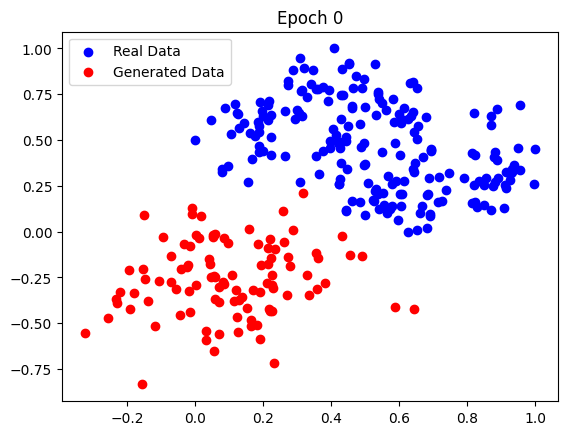

2/2 [==============================] - 0s 16ms/step
1000 [D loss: 0.5252459347248077 | D accuracy: 71.09375] [G loss: 1.324526309967041]
4/4 [==============================] - 0s 5ms/step


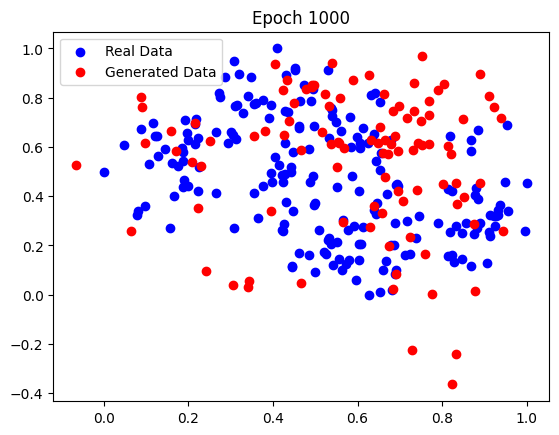

2/2 [==============================] - 0s 0s/step
2000 [D loss: 0.6291254460811615 | D accuracy: 60.15625] [G loss: 1.2455978393554688]
4/4 [==============================] - 0s 5ms/step


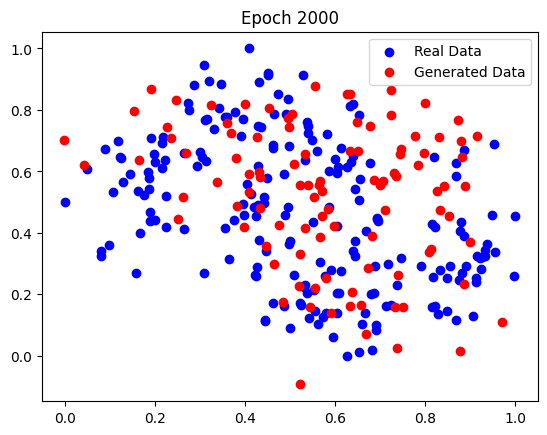

2/2 [==============================] - 0s 16ms/step
3000 [D loss: 0.6350433528423309 | D accuracy: 65.625] [G loss: 0.9917216300964355]
4/4 [==============================] - 0s 5ms/step


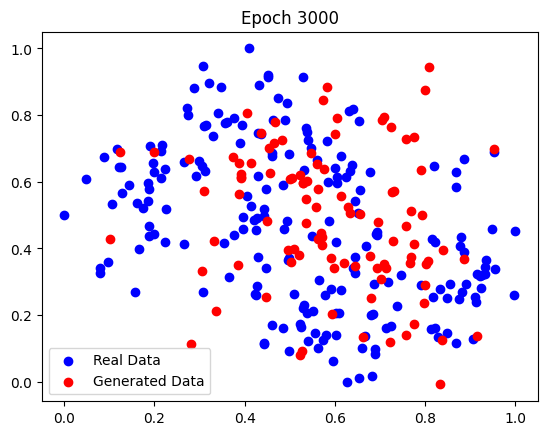

2/2 [==============================] - 0s 16ms/step
4000 [D loss: 0.5825997591018677 | D accuracy: 70.3125] [G loss: 1.2035470008850098]
4/4 [==============================] - 0s 5ms/step


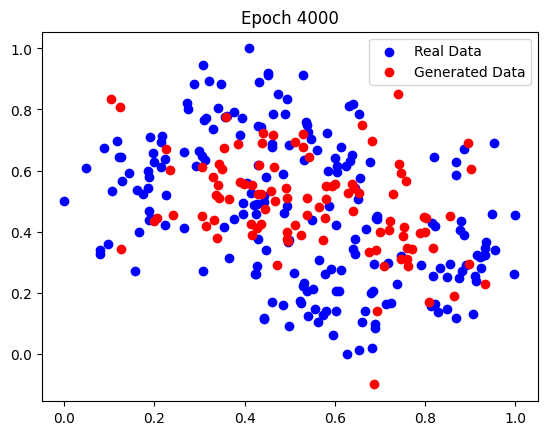

2/2 [==============================] - 0s 0s/step
5000 [D loss: 0.6303054094314575 | D accuracy: 61.71875] [G loss: 0.8461084365844727]
4/4 [==============================] - 0s 5ms/step


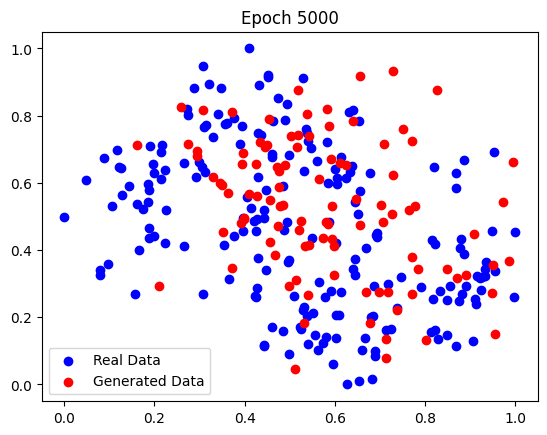

2/2 [==============================] - 0s 16ms/step
6000 [D loss: 0.6305089592933655 | D accuracy: 60.15625] [G loss: 0.7516181468963623]
4/4 [==============================] - 0s 5ms/step


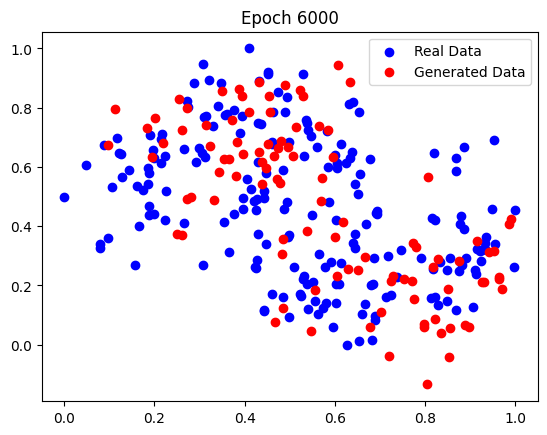

2/2 [==============================] - 0s 16ms/step
7000 [D loss: 0.6919353306293488 | D accuracy: 55.46875] [G loss: 0.7934337854385376]
4/4 [==============================] - 0s 5ms/step


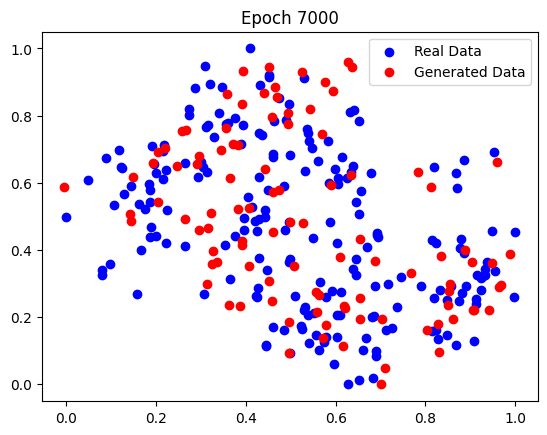

2/2 [==============================] - 0s 16ms/step
8000 [D loss: 0.6814475953578949 | D accuracy: 60.15625] [G loss: 0.8238183856010437]
4/4 [==============================] - 0s 0s/step


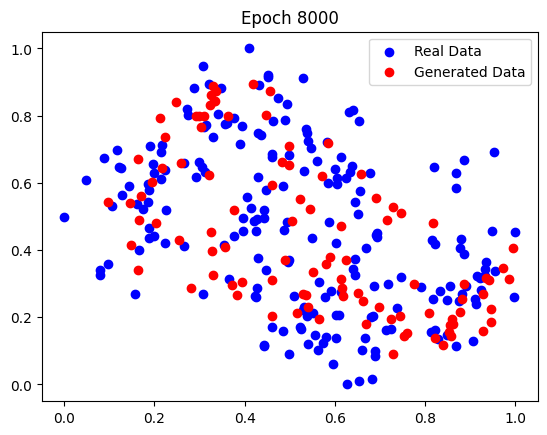

2/2 [==============================] - 0s 0s/step
9000 [D loss: 0.5933127999305725 | D accuracy: 67.96875] [G loss: 0.7616915106773376]
4/4 [==============================] - 0s 5ms/step


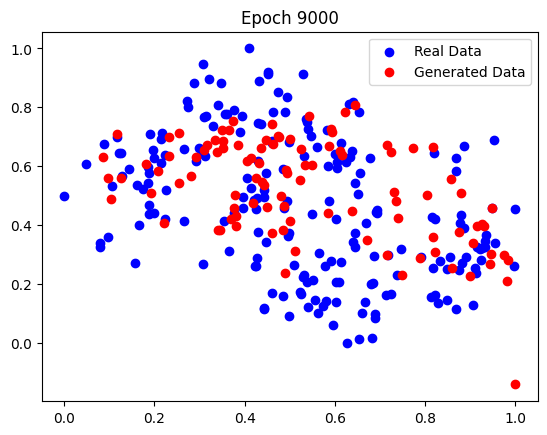

2/2 [==============================] - 0s 16ms/step
10000 [D loss: 0.5673088431358337 | D accuracy: 72.65625] [G loss: 0.9141249656677246]
4/4 [==============================] - 0s 5ms/step


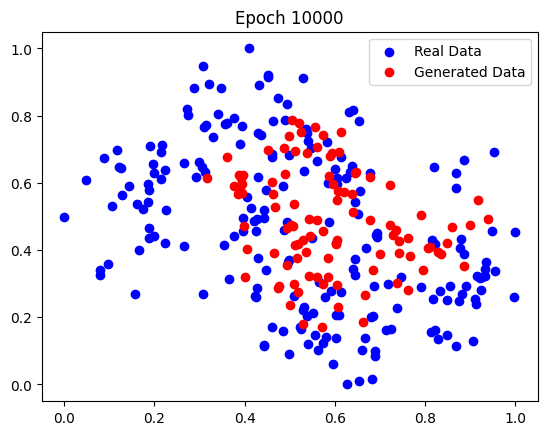

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam

# Create synthetic dataset
X, _ = make_moons(n_samples=200, noise=0.2, random_state=42)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # Normalize data between 0 and 1

# Generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(2, activation='tanh'))
    model.add(Reshape((2,)))
    return model

# Discriminator model
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(1024, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile discriminator
discriminator = build_discriminator((2,))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Compile generator
latent_dim = 100
generator = build_generator(latent_dim)

# Build and compile GAN
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training GAN
epochs = 10000
batch_size = 64

for epoch in range(epochs + 1):
    # Train discriminator
    idx = np.random.randint(0, X.shape[0], batch_size)
    real_imgs = X[idx]
    fake_imgs = generator.predict(np.random.normal(0, 1, (batch_size, latent_dim)))

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress and save generated images at specific intervals
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Generate and save synthetic data
        gen_data = generator.predict(np.random.normal(0, 1, (100, latent_dim)))
        plt.scatter(X[:, 0], X[:, 1], color='b', label='Real Data')
        plt.scatter(gen_data[:, 0], gen_data[:, 1], color='r', label='Generated Data')
        plt.title(f'Epoch {epoch}')
        plt.legend()
        plt.show()


8. **Transformer:**
   - **Structure:** Self-attention mechanism is used to capture global dependencies in input data. Composed of an encoder and a decoder, often employed in natural language processing.
   - **Example:** Transformer architecture is the foundation of models like BERT (Bidirectional Encoder Representations from Transformers) for language understanding.

These are just a few examples, and there are many other architectures and variations within deep learning. The choice of algorithm depends on the specific task, the nature of the data, and computational resources available. Additionally, ongoing research in the field continues to introduce new architectures and improvements to existing ones.